In [2]:
from main import DataLoader
from main import DataHandler
from main import googleapi
from main import npiapi
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
from pandas.io.json import json_normalize
import pandas as pd
import json
import gmaps
import requests
from config import googlekey
from ipywidgets.embed import embed_minimal_html

In [3]:
from main import FilePhysicianIndivialMIPSData
from main import FilePhysicianGroupMIPSData
pd.set_option('display.max_colwidth', -1)

In [4]:
PhysicianData=pd.DataFrame(DataLoader.LoadFile(FilePhysicianIndivialMIPSData))

In [5]:
PhysicianData

,NPI,PAC ID,Last Name,First Name,Source of scores,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score
0,1003000134,4284706367,CIBULL,THOMAS,group,92.6,100.0,40.0,95.6
1,1003000522,4284705781,WEIGAND,FREDERICK,group,93.6,100.0,40.0,96.2
2,1003000597,4082848189,KIM,DAE,group,97.9,100.0,40.0,98.8
3,1003000704,2365611035,GATTON,ZACHARY,targeted review,90.9,91.8,40.0,93.0
4,1003000902,1153415187,LOHANO,JAIVANTI,apm,94.6,86.7,40.0,93.3
...,...,...,...,...,...,...,...,...,...
413228,1992998207,7719179191,SHANE,ANITA,individual,27.9,0.0,0.0,16.8
413229,1992998645,547342438,MARUPUDI,SESHASREE,apm,86.5,69.6,40.0,84.1
413230,1992998736,4880718444,LANGLEY,ADAM,group,92.4,93.0,40.0,93.7
413231,1992999122,4284728882,JOHNSON,CHARLES,individual,59.0,93.0,40.0,73.7


In [12]:
PhysicianData["Final MIPS Score"].describe()["max"]

100.0

In [68]:
PhysicianDataMIPSAnalysis=PhysicianData
#MIPSCriteria_Bin_Build=[PhysicianData["Final MIPS Score"].describe()["min"],PhysicianData["Final MIPS Score"].describe()["25%"],PhysicianData["Final MIPS Score"].describe()["50%"],PhysicianData["Final MIPS Score"].describe()["75%"],PhysicianData["Final MIPS Score"].describe()["max"]]
MIPSCriteria_Bin_Build=[0,25,50,75,100,101]

MIPSCriteria_Bin =["Poor","Fair","Better","Good","Execellent"]
PhysicianDataMIPSAnalysis["MIPSPercentile"] = pd.cut(PhysicianDataMIPSAnalysis["Final MIPS Score"], MIPSCriteria_Bin_Build,right=False,labels=MIPSCriteria_Bin,include_lowest=True)
PhysicianDataMIPSAnalysis

,NPI,PAC ID,Last Name,First Name,Source of scores,Quality Category Score,ACI Category Score,IA Category Score,Final MIPS Score,MIPS Percentile,MIPSPercentile
0,1003000134,4284706367,CIBULL,THOMAS,group,92.6,100.0,40.0,95.6,Good,Good
1,1003000522,4284705781,WEIGAND,FREDERICK,group,93.6,100.0,40.0,96.2,Good,Good
2,1003000597,4082848189,KIM,DAE,group,97.9,100.0,40.0,98.8,Good,Good
3,1003000704,2365611035,GATTON,ZACHARY,targeted review,90.9,91.8,40.0,93.0,Good,Good
4,1003000902,1153415187,LOHANO,JAIVANTI,apm,94.6,86.7,40.0,93.3,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...
413228,1992998207,7719179191,SHANE,ANITA,individual,27.9,0.0,0.0,16.8,Poor,Poor
413229,1992998645,547342438,MARUPUDI,SESHASREE,apm,86.5,69.6,40.0,84.1,Good,Good
413230,1992998736,4880718444,LANGLEY,ADAM,group,92.4,93.0,40.0,93.7,Good,Good
413231,1992999122,4284728882,JOHNSON,CHARLES,individual,59.0,93.0,40.0,73.7,Better,Better


In [112]:
PhysicianMIPS = PhysicianDataMIPSAnalysis["MIPSPercentile"].value_counts()
PhysicianMIPS=pd.DataFrame(PhysicianMIPS)

C:\ProgramData\Anaconda3\envs\Pythondata\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


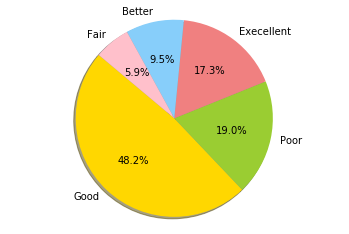

In [113]:
# Data to plot
labels = PhysicianMIPS.index
sizes = PhysicianMIPS.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','pink']
explode = (0.1, 0, 0, 0)  # explode 1st slice
explode=None
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [13]:
PhysicianDataMIPS100=PhysicianData.loc[PhysicianData["Final MIPS Score"] == 100.0]
len(PhysicianDataMIPS100)

71623

In [ ]:
##-----------Future Scope-------------------------------#################
i=0
for index,dr in PhysicianDataMIPS100.iterrows():
    if (i == 0):
        PhysicianAddress=pd.DataFrame(npiapi.GetAddress(dr))
    else:
        df=pd.DataFrame(npiapi.GetAddress(dr))
        PhysicianAddress=PhysicianAddress.append(df,verify_integrity=False,ignore_index=True)
    i = i+1
PhysicianAddress